In [1]:
# Load csv as pandas dataframe
import pandas as pd

# Load csv as pandas dataframe
cleanedPatternDf = pd.read_csv('Datasets/scraped_blog_tables.csv')
cleanedPatternDf.head()

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,12/19/2019,01/30/2020,IT Services
1,ADS,Broadening top,-1,12/13/2019,01/24/2020,Information Services
2,AVY,Triple bottom,1,12/03/2019,01/27/2020,Packaging and Container
3,CMTL,Dead-cat bounce,-1,01/29/2020,01/29/2020,Telecom. Equipment
4,CSOD,Pipe top,-1,01/13/2020,01/21/2020,E-Commerce


In [2]:
cleanedPatternDf['Start'] = pd.to_datetime(cleanedPatternDf['Start'])
cleanedPatternDf['End'] = pd.to_datetime(cleanedPatternDf['End'])

# Data set Creation


## Remove data of missing data Symbols


In [3]:
# get the csv file names exept the extension in the folder OHLS data 
import os
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('Datasets/OHLS data') if isfile(join('Datasets/OHLS data', f))]
onlyfiles = [f.split('.')[0] for f in onlyfiles]
print(onlyfiles)

#  now remove any row that contain a Symbol that is not in the list of csv file names from the filteredPatternDf dataframe
cleanedPatternDf = cleanedPatternDf[cleanedPatternDf['Symbol'].isin(onlyfiles)]
cleanedPatternDf.head()

['A', 'AA', 'AAPL', 'ABM', 'ABT', 'ACGL', 'ACIW', 'ACN', 'ADBE', 'ADM', 'ADP', 'ADSK', 'ADTN', 'AEIS', 'AEO', 'AEP', 'AES', 'AFG', 'AFL', 'AGO', 'AIG', 'AIZ', 'AKAM', 'ALB', 'ALGT', 'ALK', 'ALKS', 'ALL', 'ALRM', 'AMAT', 'AMD', 'AME', 'AMED', 'AMGN', 'AMN', 'AMTD', 'AMWD', 'AMZN', 'ANET', 'ANF', 'ANIK', 'AON', 'APA', 'APD', 'APH', 'APOG', 'AR', 'ARCB', 'ARW', 'ASGN', 'ASH', 'ATO', 'ATR', 'ATSG', 'AVA', 'AVNT', 'AVY', 'AWI', 'AXDX', 'AXP', 'AXS', 'AYI', 'AZTA', 'BA', 'BAH', 'BALL', 'BAX', 'BBW', 'BBY', 'BCO', 'BCPC', 'BECN', 'BERY', 'BFH', 'BG', 'BIG', 'BIIB', 'BIO', 'BKH', 'BKNG', 'BLDR', 'BMI', 'BMRN', 'BMY', 'BOOM', 'BOOT', 'BOTZ', 'BR', 'BRC', 'BRKR', 'BSET', 'BSX', 'BZH', 'CACI', 'CAG', 'CAL', 'CALM', 'CBT', 'CCK', 'CCRN', 'CDNS', 'CE', 'CENX', 'CF', 'CGNX', 'CHD', 'CHKP', 'CI', 'CIEN', 'CINF', 'CL', 'CLF', 'CLNE', 'CLS', 'CLX', 'CMCO', 'CMI', 'CMTL', 'CNA', 'CNC', 'CNO', 'CNP', 'CNX', 'COP', 'COR', 'COST', 'COTY', 'CPB', 'CR', 'CRH', 'CRL', 'CRM', 'CROX', 'CSCO', 'CSGP', 'CSGS', 'C

,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,2019-12-19,2020-01-30,IT Services
2,AVY,Triple bottom,1,2019-12-03,2020-01-27,Packaging and Container
3,CMTL,Dead-cat bounce,-1,2020-01-29,2020-01-29,Telecom. Equipment
5,EBAY,Rectangle bottom,-1,2019-10-25,2020-01-28,Internet
7,DHI,"Scallop, ascending",1,2019-12-12,2020-01-28,Homebuilding


## creating a dataset with selected patterns


In [4]:
#  get all the unique values in the Chart Pattern column 
uniquePatterns=cleanedPatternDf['Chart Pattern'].value_counts()
uniquePatterns.head(30)

Chart Pattern
Pipe bottom                     1390
Double Bottom, Adam and Adam     637
Pipe top                         588
Ugly double bottom               576
Triangle, symmetrical            519
Double Top, Adam and Adam        434
Triple top                       349
Triple bottom                    345
Head-and-shoulders top           342
Head-and-shoulders bottom        315
Double Top, Adam and Eve         275
Double Bottom, Eve and Adam      275
Double Top, Eve and Eve          273
Dead-cat bounce                  269
Double Bottom, Eve and Eve       222
Double Top, Eve and Adam         221
Flag, high and tight             208
Double Bottom, Adam and Eve      199
Broadening top                   199
Diamond top                      155
Broadening bottom                129
Triangle, ascending              124
Three Rising Valleys             124
Triangle, descending             106
Rectangle top                     81
Diamond bottom                    78
Horn top                

Selected Patterns

- Double Bottom, Adam and Adam : 518
- Triangle, symmetrical : 483
- Double Top, Adam and Adam : 295
- Double Bottom, Eve and Adam : 208
- Head-and-shoulders bottom : 291
- Head-and-shoulders top : 263
- Cup with handle : 61
- Flag, high and tight :231


In [5]:
filteredPatternDf = cleanedPatternDf[cleanedPatternDf['Chart Pattern'].isin(['Double Bottom, Adam and Adam', 'Triangle, symmetrical', 'Double Top, Adam and Adam', 'Double Bottom, Eve and Adam', 'Head-and-shoulders bottom', 'Head-and-shoulders top', 'Cup with handle','Flag, high and tight'])]

# print the un unique values in the Chart Pattern column
print(filteredPatternDf['Chart Pattern'].unique())

filteredPatternDf.head()

['Triangle, symmetrical' 'Double Bottom, Eve and Adam'
 'Flag, high and tight' 'Head-and-shoulders top'
 'Head-and-shoulders bottom' 'Double Top, Adam and Adam'
 'Double Bottom, Adam and Adam' 'Cup with handle']


,Symbol,Chart Pattern,BullishBearish,Start,End,Industry
0,ACN,"Triangle, symmetrical",1,2019-12-19,2020-01-30,IT Services
14,TPX,"Double Bottom, Eve and Adam",1,2020-01-06,2020-01-27,Furn/Home Furnishings
20,BBW,"Flag, high and tight",1,2019-12-12,2020-01-23,Retail (Special Lines)
22,CIEN,"Triangle, symmetrical",1,2019-12-13,2020-01-23,Telecom. Equipment
23,EVH,"Flag, high and tight",1,2019-11-27,2020-01-17,Healthcare Information


# Test Train Split


In [6]:
#  split a 20% of each class in the Dataset Dataframe for testing  and 80% for training
from sklearn.model_selection import train_test_split

# Split the Dataset into training and testing sets
train, test = train_test_split(filteredPatternDf, test_size=0.2,random_state =6699, stratify=filteredPatternDf['Chart Pattern'])

# Display the shape of the training and testing sets
print(f'Training Set Shape: {train.shape}')
print(f'Testing Set Shape: {test.shape}')

# display the amount of data in each class in the train and test data
print("train data",train['Chart Pattern'].value_counts())
print("test data",test['Chart Pattern'].value_counts())



Training Set Shape: (2233, 6)
Testing Set Shape: (559, 6)
train data Chart Pattern
Double Bottom, Adam and Adam    509
Triangle, symmetrical           415
Double Top, Adam and Adam       347
Head-and-shoulders top          274
Head-and-shoulders bottom       252
Double Bottom, Eve and Adam     220
Flag, high and tight            166
Cup with handle                  50
Name: count, dtype: int64
test data Chart Pattern
Double Bottom, Adam and Adam    128
Triangle, symmetrical           104
Double Top, Adam and Adam        87
Head-and-shoulders top           68
Head-and-shoulders bottom        63
Double Bottom, Eve and Adam      55
Flag, high and tight             42
Cup with handle                  12
Name: count, dtype: int64


In [7]:
test.to_csv('Datasets/VanilaDataset/test_patterns_with_symbols.csv', index=False)
train.to_csv('Datasets/VanilaDataset/train_patterns_with_symbols.csv', index=False)

# Format dataset


In [8]:
pattern_encoding = {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}

def indexes_fix(dataset):
    print("Fixing indexes...")
    # Print the data types of two levels of the index
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)

    # Change the data type of level 0 index to int
    dataset.index = dataset.index.set_levels(
        dataset.index.levels[0].astype('int'), level=0
    )

    # Print the data types after modification
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)

    # Convert level 1 index to int64
    dataset.index = dataset.index.set_levels(
        dataset.index.levels[1].astype('int64'), level=1
    )


    # Print the data types after modification
    print(dataset.index.get_level_values(0).dtype, dataset.index.get_level_values(1).dtype)
    
    return dataset

def customOneHotEncode (dataset):
    print("One hot encoding...")
    patterns = dataset['Pattern'].unique()
    # Create a dictionary that maps each unique pattern to a unique integer
    # pattern_encoding = {pattern: idx for idx, pattern in enumerate(patterns)}
    # Print the pattern encoding dictionary
    print("Pattern Encoding Dictionary: ",pattern_encoding)
    
    # Encode the 'Pattern' column using the automatically generated encoding dictionary
    dataset['Pattern'] = dataset['Pattern'].map(pattern_encoding)
    
    # Check for any NaN values in the encoded test dataset (in case there are missing patterns)
    if dataset['Pattern'].isnull().any():
        print("Warning: Some patterns in the test dataset are missing from the training dataset.")
    
    return dataset

def normalize_dataset(dataset):
    # calculate the min values from Low column and max values from High column for each instance
    min_low = dataset.groupby(level='Instance')['Low'].transform('min')
    max_high = dataset.groupby(level='Instance')['High'].transform('max')
    
    # OHLC columns to normalize
    ohlc_columns = ['Open', 'High', 'Low', 'Close']
    
    dataset_normalized = dataset.copy()
    
    # Apply the normalization formula to all columns in one go
    dataset_normalized[ohlc_columns] = (dataset_normalized[ohlc_columns] - min_low.values[:, None]) / (max_high.values[:, None] - min_low.values[:, None])
    
    # if there is a Volume column normalize it
    if 'Volume' in dataset.columns:
        # calculate the min values from Volume column and max values from Volume column for each instance
        min_volume = dataset.groupby(level='Instance')['Volume'].transform('min')
        max_volume = dataset.groupby(level='Instance')['Volume'].transform('max')
        
        # Normalize the Volume column
        dataset_normalized['Volume'] = (dataset_normalized['Volume'] - min_volume.values) / (max_volume.values - min_volume)
    
    
    return dataset_normalized    

def dataset_format(filteredPatternDf):
    # Create an empty DataFrame for the time series with a MultiIndex for chart patterns and integers as indexes
    Dataset = pd.DataFrame(columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Pattern'],
                        index=pd.MultiIndex(levels=[[], []], codes=[[], []], names=['Instance', 'Time']))

    # Initialize a counter for unique instances
    instance_counter = 0

    # Loop through the filtered dataset
    for index, row in filteredPatternDf.iterrows():
        symbol = row['Symbol']
        start_date = pd.to_datetime(row['Start'])
        end_date = pd.to_datetime(row['End'])
        padding=0
        if row['Chart Pattern'] == 'Triangle, symmetrical':
            padding = 0
        else:
            # Calculate the padding for the time range (25% of the time range length)
            padding = int((end_date - start_date).days * 0.3)
        
        # Adjust the date range to include padding
        padded_start_date = start_date - pd.Timedelta(days=padding)
        padded_end_date = end_date + pd.Timedelta(days=padding)
        
        # Read the CSV file containing the OHLC data for the symbol
        symbol_df = pd.read_csv(f'Datasets/OHLS data/{symbol}.csv')
        symbol_df['Date'] = pd.to_datetime(symbol_df['Date'])
        
        # Filter the symbol DataFrame to include only the date range with padding
        symbol_df_filtered = symbol_df[(symbol_df['Date'] >= padded_start_date) & 
                                    (symbol_df['Date'] <= padded_end_date)]
        
        # Reset index to integers (from dates)
        symbol_df_filtered.reset_index(drop=True, inplace=True)
        
        # check if symbol_df_filtered is empty , if so print why
        if symbol_df_filtered.empty:
            # print(f"Symbol {symbol} has no data between {padded_start_date} and {padded_end_date}")
            continue
        
        # Create a MultiIndex for the symbol_df_filtered
        time_index = range(len(symbol_df_filtered))
        
        # Create the MultiIndex where the first level is the unique instance counter
        multi_index = pd.MultiIndex.from_product([[instance_counter], time_index], names=['Instance', 'Time'])
        
        # Assign the MultiIndex directly to the DataFrame
        symbol_df_filtered.index = multi_index
        
        # # Append the Pattern column to indicate the chart pattern
        # symbol_df_filtered['Pattern'] = row['Chart Pattern']
        if not symbol_df_filtered.empty:
            # Append the Pattern column to indicate the chart pattern
            symbol_df_filtered = symbol_df_filtered.copy()  # Create a copy
            symbol_df_filtered['Pattern'] = row['Chart Pattern']

        
            # Concatenate the filtered DataFrame to the Dataset
            Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)
        
            # Increment the instance counter for the next occurrence
            instance_counter += 1

   
    
    # fix the indexes
    Dataset=indexes_fix(Dataset)
    
    Dataset = customOneHotEncode(Dataset)
    
    
    # Final Fixes :
    # convert the volume column to float64 data type
    Dataset['Volume'] = Dataset['Volume'].astype('float64')
    print("data types /n",Dataset.dtypes)
    # Drop date column
    Dataset.drop('Date', axis=1, inplace=True)    
    
    # Drop the 'Adj Close' column ########################
    Dataset.drop('Adj Close', axis=1, inplace=True)
    
    # Display the head of the Dataset
    # print(Dataset.head())
    
    Dataset = normalize_dataset(Dataset)
    
    return Dataset


In [9]:
#  create formatted data set for the train and test data
trainDataset = dataset_format(train)
testDataset = dataset_format(test)

C:\Users\gwiku\AppData\Local\Temp\ipykernel_13384\1066207462.py:127: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)


Fixing indexes...
object object
int32 object
int32 int64
One hot encoding...
Pattern Encoding Dictionary:  {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
data types /n Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Pattern               int64
Date         datetime64[ns]
dtype: object


C:\Users\gwiku\AppData\Local\Temp\ipykernel_13384\1066207462.py:127: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Dataset = pd.concat([Dataset, symbol_df_filtered], axis=0)


Fixing indexes...
object object
int32 object
int32 int64
One hot encoding...
Pattern Encoding Dictionary:  {'Double Top, Adam and Adam': 0, 'Triangle, symmetrical': 1, 'Double Bottom, Eve and Adam': 2, 'Head-and-shoulders top': 3, 'Double Bottom, Adam and Adam': 4, 'Head-and-shoulders bottom': 5, 'Flag, high and tight': 6, 'Cup with handle': 7}
data types /n Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Pattern               int64
Date         datetime64[ns]
dtype: object


In [10]:
trainDataset

Open      High       Low     Close    Volume  Pattern
Instance Time                                                           
0        0     0.015474  0.113475  0.009671  0.112830  0.232915        6
         1     0.121857  0.161831  0.070277  0.147647  0.205692        6
         2     0.170213  0.177950  0.092843  0.105093  0.101064        6
         3     0.110896  0.123791  0.031593  0.042553  0.103393        6
         4     0.032882  0.050290  0.002579  0.050290  0.071623        6
...                 ...       ...       ...       ...       ...      ...
2225     17    0.665865  0.714822  0.555353  0.574300  0.473540        1
         18    0.551024  0.646629  0.480908  0.519188  0.110101        1
         19    0.426277  0.497355  0.306146  0.463499  0.170217        1
         20    0.419448  0.501010  0.337117  0.430894  0.162501        1
         21    0.417044  0.613254  0.404251  0.598057  0.105178        1

[58246 rows x 6 columns]

In [11]:
# Filter the DataFrame where the level one index 'Instance' is equal to a specific value, e.g., 0
filtered_data = trainDataset.xs(5, level='Instance')
filtered_data

,Open,High,Low,Close,Volume,Pattern
Time,,,,,,
0,0.426752,0.426752,0.085352,0.155414,0.912882,4
1,0.161784,0.450956,0.000000,0.384714,0.899121,4
2,0.569426,0.863693,0.532485,0.831846,1.000000,4
3,0.760509,1.000000,0.696815,0.770700,0.476875,4
4,0.852229,0.936306,0.714649,0.774522,0.328608,4
5,0.654776,0.940127,0.096816,0.870063,0.307191,4
6,0.903185,0.935033,0.554140,0.642039,0.000000,4


In [12]:
import mplfinance as mpf
import pandas as pd

def plot_csgraph(filtered_data):
    # Assuming filtered_data is your DataFrame with OHLC data
    # Ensure the DataFrame has the required columns: 'Open', 'High', 'Low', 'Close'
    required_columns = ['Open', 'High', 'Low', 'Close']
    if all(column in filtered_data.columns for column in required_columns):
        # Set the index to a datetime column if not already set
        if not pd.api.types.is_datetime64_any_dtype(filtered_data.index):
            filtered_data.index = pd.to_datetime(filtered_data.index)

        # Plot the candlestick chart
        mpf.plot(filtered_data, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')
    else:
        print("The DataFrame does not contain the required OHLC columns.")

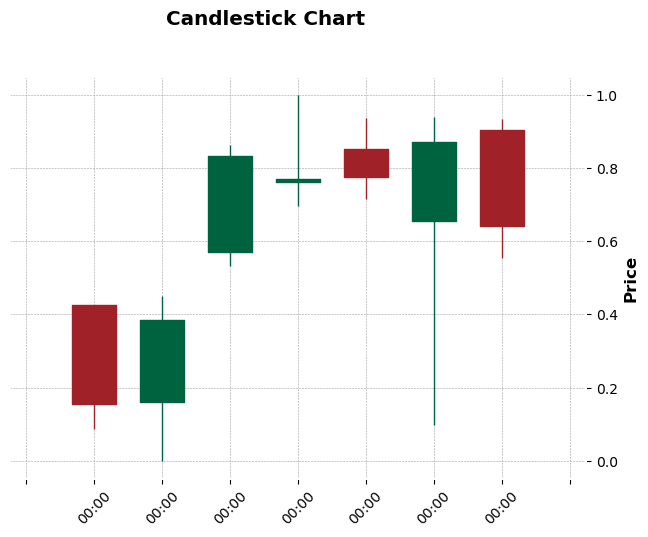

In [13]:
# Plot the candlestick chart for the filtered data and the normalized data
plot_csgraph(filtered_data)

In [14]:
# save test and train data to csv
trainDataset.to_csv('Datasets/VanilaDataset/trainDataset.csv')
testDataset.to_csv('Datasets/VanilaDataset/testDataset.csv')

# Test Rocket


In [15]:
# Create a temporary DataFrame with level 0 indexes and the 'Pattern' column
temp_df = trainDataset.reset_index(level=0)  # Resetting level 1 index to create a flat DataFrame
# drop all the columns except the 'Pattern' column and the Level_0 column
temp_df = temp_df[['Instance','Pattern']]

# drop all the duplicate rows in the temp_df dataframe
temp_df = temp_df.drop_duplicates()

# get the number of each unique value in the 'Pattern' column
pattern_counts = temp_df['Pattern'].value_counts()
print(pattern_counts)

Pattern
4    507
1    415
0    347
3    271
5    252
2    219
6    165
7     50
Name: count, dtype: int64


In [16]:
# split the trainDataset_aug_encoded dataframe into X_train and y_train and the testDataset_encoded dataframe into X_test and y_test
X_train = trainDataset.drop(columns='Pattern')
y_train = trainDataset['Pattern']

X_test = testDataset.drop(columns='Pattern')
y_test = testDataset['Pattern']

# drop level 1 indexes from y_train and y_test
y_train = y_train.droplevel(1)
y_test = y_test.droplevel(1)
# now group the y_train and y_test by their indexes
y_train = y_train.groupby(y_train.index).first()
y_test = y_test.groupby(y_test.index).first()

# Display the shapes of the training and testing sets
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape}")

X_train Shape: (58246, 5), y_train Shape: (2226,)
X_test Shape: (14385, 5), y_test Shape: (558,)


In [17]:
#  save test and train data to csv
X_train.to_csv('Datasets/VanilaDataset/X-Y Splitted Data/X_train.csv')
y_train.to_csv('Datasets/VanilaDataset/X-Y Splitted Data/y_train.csv')
X_test.to_csv('Datasets/VanilaDataset/X-Y Splitted Data/X_test.csv')
y_test.to_csv('Datasets/VanilaDataset/X-Y Splitted Data/y_test.csv')



In [18]:
from sktime.datatypes import check_is_mtype

check_is_mtype(X_train, mtype="pd-multiindex", return_metadata=True)

(True,
 None,
 {'is_univariate': False,
  'is_empty': False,
  'has_nans': False,
  'n_features': 5,
  'feature_names': ['Open', 'High', 'Low', 'Close', 'Volume'],
  'dtypekind_dfip': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'feature_kind': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'n_instances': 2226,
  'is_one_series': False,
  'is_equal_length': False,
  'is_equally_spaced': True,
  'n_panels': 1,
  'is_one_panel': True,
  'mtype': 'pd-multiindex',
  'scitype': 'Panel'})

Accuracy: 0.82


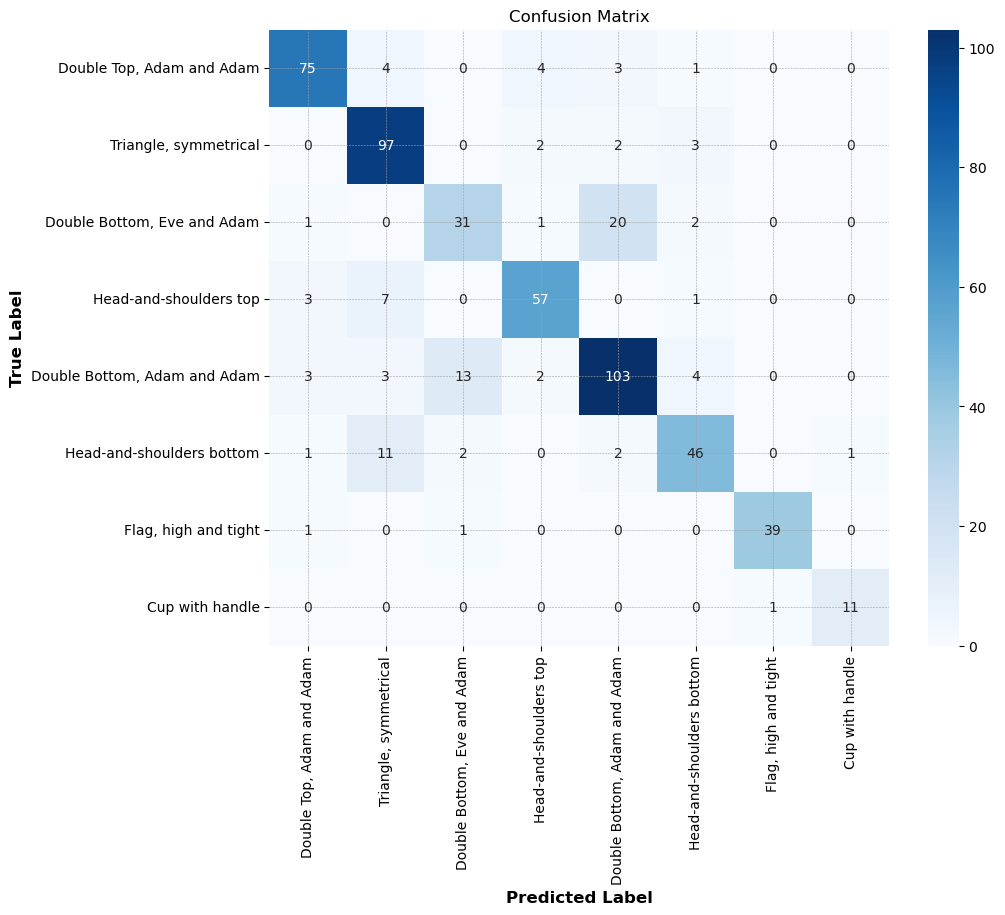

In [19]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.padder import PaddingTransformer
from sktime.datasets import load_unit_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

my_padded_multi_rocket = PaddingTransformer() * RocketClassifier(rocket_transform='multirocket')
my_padded_multi_rocket.fit(X_train, y_train)
y_pred_multi = my_padded_multi_rocket.predict(X_test) 

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_multi)
print(f"Accuracy: {accuracy:.2f}")

# Create the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_multi)

# Create a DataFrame from the confusion matrix
cm_df3 = pd.DataFrame(cm3, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Hivecote 2.0 test


Training and testing classifier: ROCKET
ROCKET Training Time: 311.92 seconds
ROCKET Prediction Time: 38.70 seconds
ROCKET Accuracy: 0.82


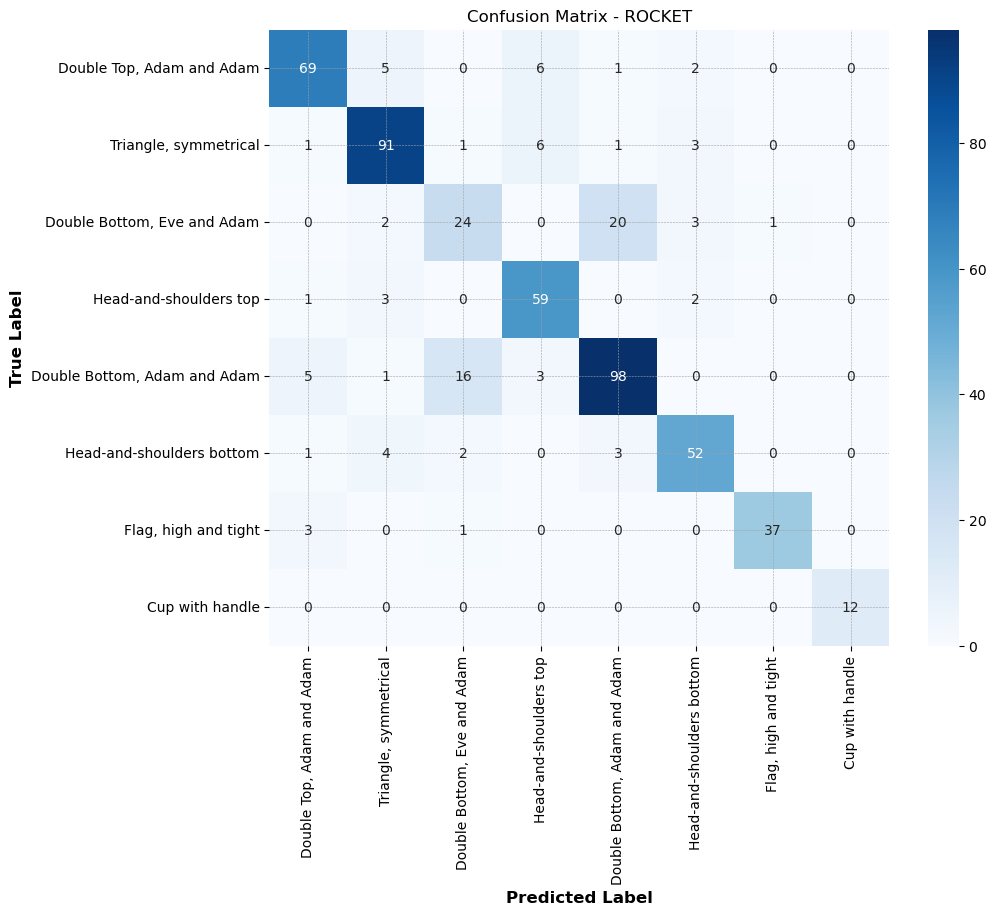

Training and testing classifier: MiniROCKET
MiniROCKET Training Time: 32.22 seconds
MiniROCKET Prediction Time: 3.38 seconds
MiniROCKET Accuracy: 0.79


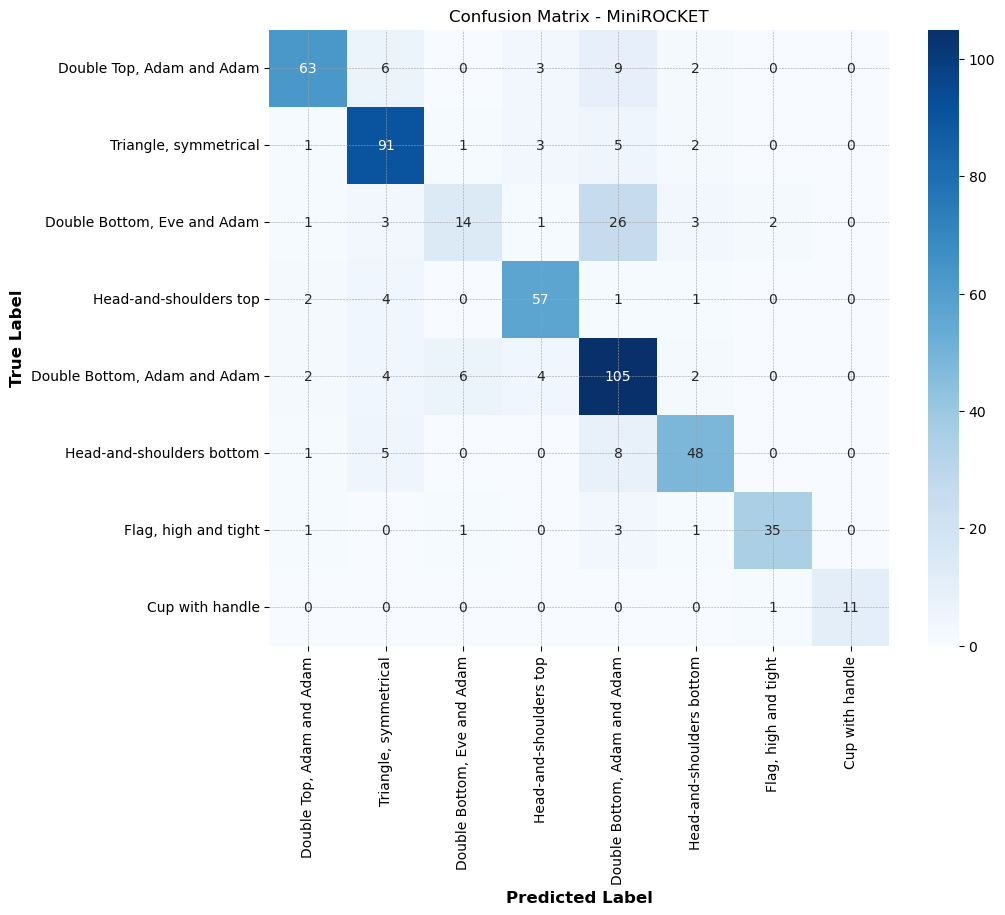

Training and testing classifier: MultiROCKET
MultiROCKET Training Time: 181.03 seconds
MultiROCKET Prediction Time: 46.90 seconds
MultiROCKET Accuracy: 0.81


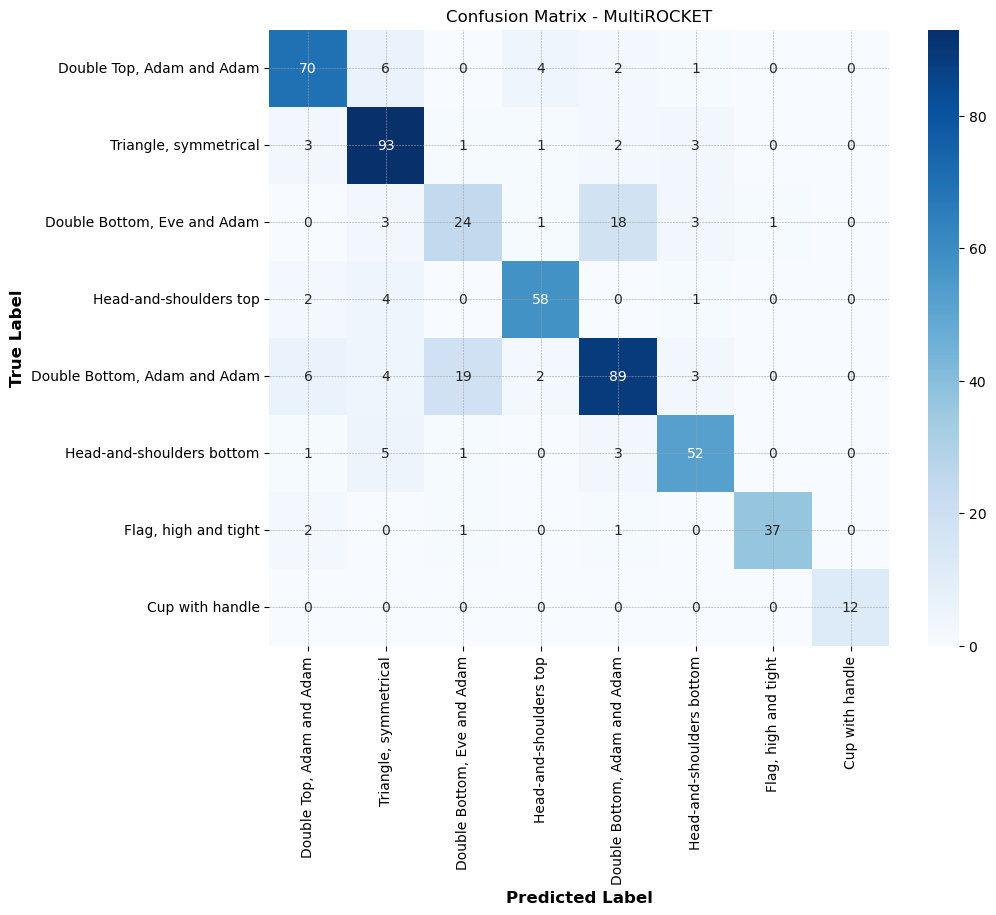

Training and testing classifier: HIVE-COTE


c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transform

HIVE-COTE Training Time: 71587.32 seconds


c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


HIVE-COTE Prediction Time: 972.50 seconds
HIVE-COTE Accuracy: 0.82


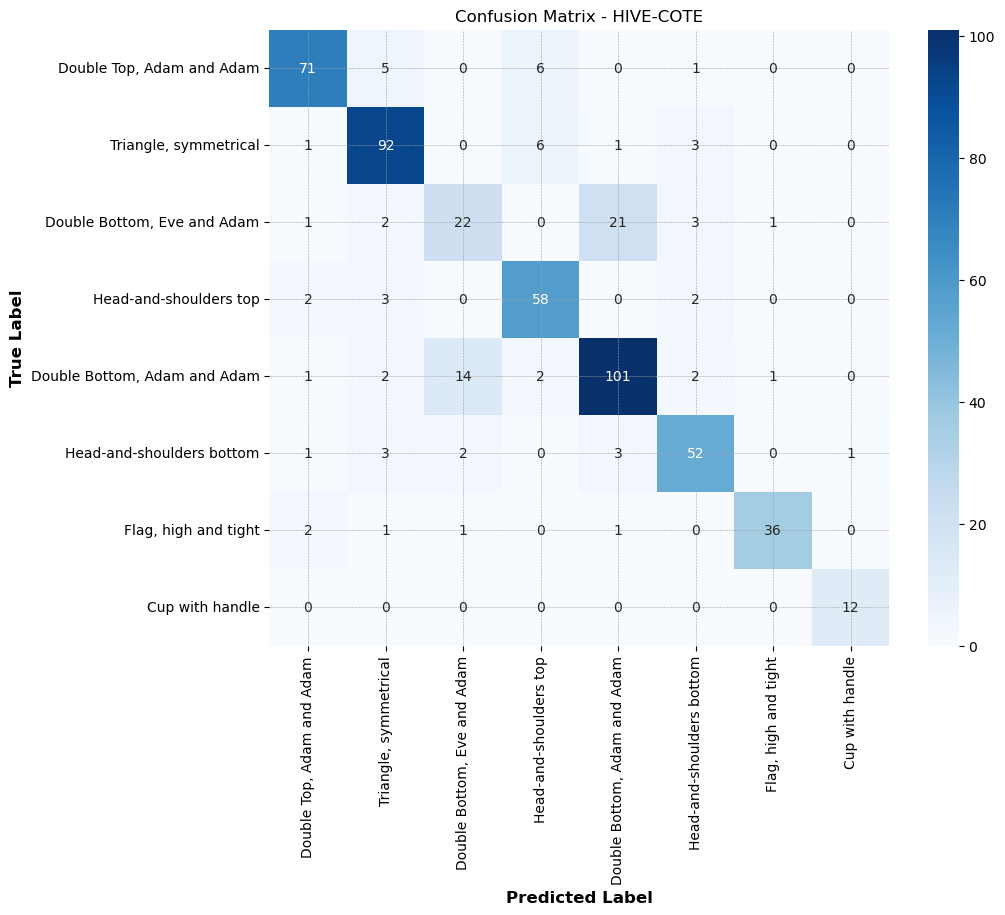

Training and testing classifier: DrCIF


c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(
c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transform

DrCIF Training Time: 14037.46 seconds


c:\Users\gwiku\miniconda3\envs\FYPenv\Lib\site-packages\sktime\transformations\panel\catch22.py:350: FutureWarning: In Catch22._transform_single_feature, the argument case_id is deprecated and will be removed in the future.
  warn(


DrCIF Prediction Time: 104.20 seconds
DrCIF Accuracy: 0.75


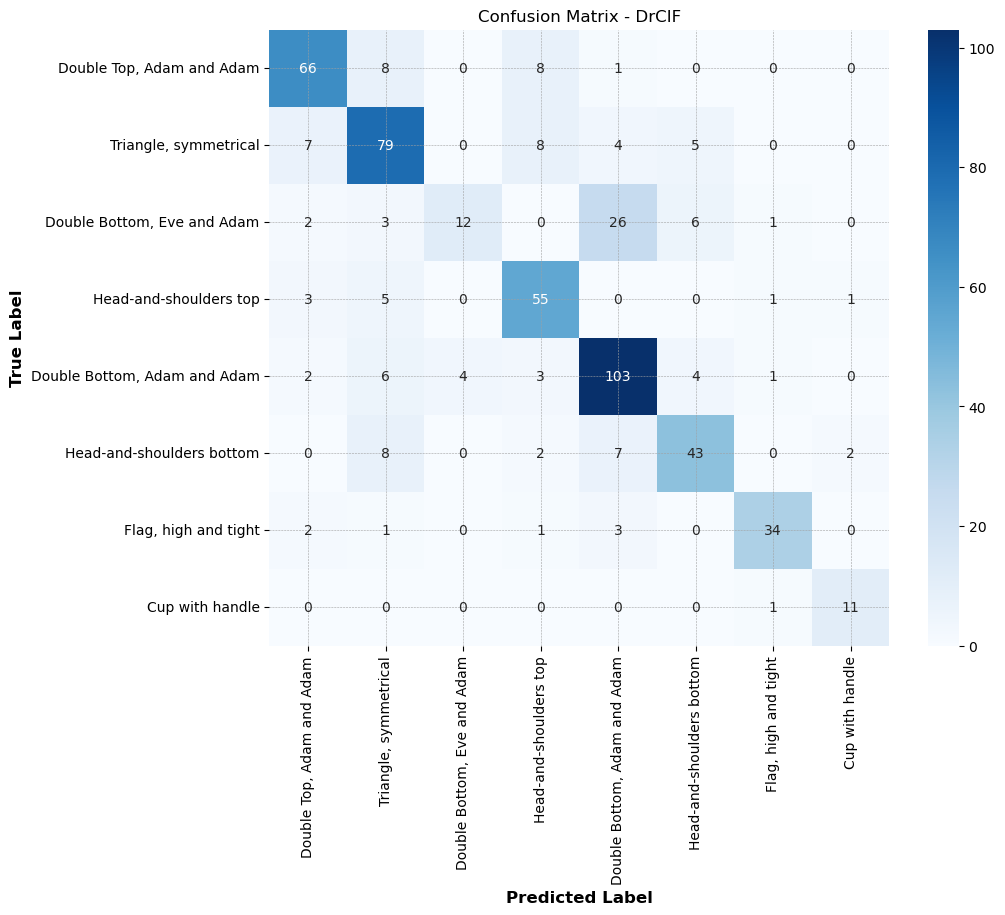

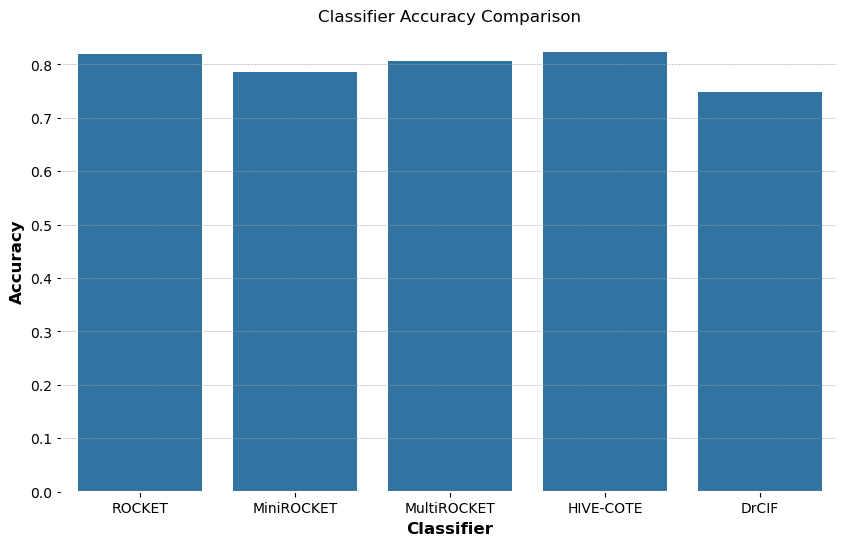


ROCKET Results:
Accuracy: 0.82
Training Time: 311.92 seconds
Prediction Time: 38.70 seconds

MiniROCKET Results:
Accuracy: 0.79
Training Time: 32.22 seconds
Prediction Time: 3.38 seconds

MultiROCKET Results:
Accuracy: 0.81
Training Time: 181.03 seconds
Prediction Time: 46.90 seconds

HIVE-COTE Results:
Accuracy: 0.82
Training Time: 71587.32 seconds
Prediction Time: 972.50 seconds

DrCIF Results:
Accuracy: 0.75
Training Time: 14037.46 seconds
Prediction Time: 104.20 seconds


In [19]:
import os
import time
import joblib
from sktime.classification.kernel_based import RocketClassifier
from sktime.classification.shapelet_based import ShapeletLearningClassifierTslearn
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.deep_learning import InceptionTimeClassifier
from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.interval_based import DrCIF
from sktime.transformations.panel.padder import PaddingTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the classifiers to test (with correct MiniRocket and MultiRocket setup)
classifiers = {
    "ROCKET": RocketClassifier(rocket_transform='rocket'),
    "MiniROCKET": RocketClassifier(rocket_transform='minirocket'),
    "MultiROCKET": RocketClassifier(rocket_transform='multirocket'),  # MultiRocket definition
    # "InceptionTime": InceptionTimeClassifier(),
    # 'ShapeletLearningTslearn': ShapeletLearningClassifierTslearn(),
    "HIVE-COTE": HIVECOTEV2(),
    "DrCIF": DrCIF()
}

# Initialize a dictionary to store results
results = {}

# Create folder for saving trained models
model_save_dir = 'test_models'
os.makedirs(model_save_dir, exist_ok=True)

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"Training and testing classifier: {name}")
    
    # Initialize a Padding Transformer
    padder = PaddingTransformer()

    # Apply padding and fit the classifier
    pipeline = padder * clf
    
    # Fit the classifier and save the trained model
    start_time_train = time.time()
    pipeline.fit(X_train, y_train)
    end_time_train = time.time()
    train_duration = end_time_train - start_time_train
    print(f"{name} Training Time: {train_duration:.2f} seconds")
    
    # Save the trained model
    joblib.dump(pipeline, os.path.join(model_save_dir, f"{name}_model.pkl"))
    
    # Measure prediction time
    start_time_predict = time.time()
    y_pred = pipeline.predict(X_test)
    end_time_predict = time.time()
    predict_duration = end_time_predict - start_time_predict
    print(f"{name} Prediction Time: {predict_duration:.2f} seconds")

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store results
    results[name] = {
        "accuracy": accuracy,
        "y_pred": y_pred,
        "train_duration": train_duration,
        "predict_duration": predict_duration
    }

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame from the confusion matrix (adjusting to your 'pattern_encoding' if needed)
    cm_df = pd.DataFrame(cm, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

    # Plot confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Display final accuracy comparison
accuracy_results = {name: result["accuracy"] for name, result in results.items()}
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Classifier", "Accuracy"])

# Plotting the accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x="Classifier", y="Accuracy", data=accuracy_df)
plt.title("Classifier Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Print detailed timing results
for name, result in results.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Training Time: {result['train_duration']:.2f} seconds")
    print(f"Prediction Time: {result['predict_duration']:.2f} seconds")


# Data Augment


In [28]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt



# Define a linear trend function (y = a*x + b)
def linear_trend(x, slope=0.1, intercept=0):
    return slope * x + intercept

# Define a non-linear (quadratic) trend function (y = a*x^2 + b*x + c)
def quadratic_trend(x, a=0.001, b=0.01, c=0):
    return a * x**2 + b * x + c

# Define a sine wave trend function
def sine_trend(x, amplitude=0.02, frequency=0.05 ):
    return amplitude * np.sin(frequency * x)

def traindata_augment(Dataset):
    # Define the number of samples to generate
    n_total_samples = 500
    # Create a counter for generating new first-level indices
    new_first_level_counter = Dataset.index.get_level_values(0).max() + 1

    # Loop through the unique chart patterns in the Dataset
    for pattern in Dataset['Pattern'].unique():
        # Filter the Dataset for the current pattern
        pattern_data = Dataset[Dataset['Pattern'] == pattern]

        # Get the unique values from the first level of the multi-index
        unique_first_level_index = pattern_data.index.get_level_values(0).unique()

        # Set the number of augmented samples to create
        n_samples = n_total_samples - len(unique_first_level_index)

        # Loop through the number of samples to generate
        for i in range(n_samples):
            # Randomly select a section of the DataFrame based on the first-level index
            random_first_level_value = np.random.choice(unique_first_level_index)
            random_section = pattern_data.loc[(random_first_level_value, slice(None)), :]

            # Get the difference between max and min of Close column
            diff = random_section['Close'].max() - random_section['Close'].min()
            adjusted_diff = np.log(1 + diff)  # Adding 1 to avoid log(0)

            # Introduce randomness into the noise level
            noise_level = adjusted_diff * (0.08 + np.random.uniform(-0.01, 0.01))  # Adding random factor
            sub_noise_level = adjusted_diff * (0.01 + np.random.uniform(-0.004, 0.004))  # Adding random factor

            x_values = np.arange(len(random_section))

            # Randomly select a trend function
            trend_function = np.random.choice([linear_trend, quadratic_trend, sine_trend])

            print(f"\nSelected Chart Pattern: {pattern}")
            print(f"\nSelected Trend Function: {trend_function.__name__}")

            # Modify the trend function parameters based on price range and random factors
            if trend_function == linear_trend:
                slope = np.random.uniform(0.005, 0.05) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Slope depends on price difference
                trend = linear_trend(x_values, slope=slope)
                print('slope:', slope)
            elif trend_function == quadratic_trend:
                a = np.random.uniform(0.00001, 0.0005) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Quadratic coefficient scaled by diff
                b = np.random.uniform(0.001, 0.01) * adjusted_diff
                trend = quadratic_trend(x_values, a=a, b=b)
                print('a:', a, 'b:', b)
            else:  # sine_trend
                amplitude = np.random.uniform(0.05, 1.2) * adjusted_diff * (0.4 + np.random.uniform(-0.01, 0.01))   # Amplitude depends on price difference
                frequency = np.random.uniform(0.01, 1)
                trend = sine_trend(x_values, amplitude=amplitude, frequency=frequency)
                print('amplitude:', amplitude, 'frequency:', frequency)

            # # Plot the trend function
            # plt.figure(figsize=(10, 6))
            # plt.plot(x_values, trend, label=f'{trend_function.__name__}')
            # plt.title('Trend Function Plot')
            # plt.xlabel('x')
            # plt.ylabel('y')
            # plt.legend()
            # plt.grid(True)
            # plt.show()

            # Add random noise (minor noise level) for variation in individual OHLC points
            noise = np.random.normal(0, sub_noise_level, random_section[['Open', 'High', 'Low', 'Close', 'Volume']].shape)
            noisy_data = random_section[['Open', 'High', 'Low', 'Close', 'Volume']] + noise

            # Add consistent noise across the same row (major noise level)
            row_noise = np.random.normal(0, noise_level, random_section[['Open']].shape)
            noisy_data['Open'] = random_section['Open'] + row_noise.squeeze()
            noisy_data['High'] = random_section['High'] + row_noise.squeeze()
            noisy_data['Low'] = random_section['Low'] + row_noise.squeeze()
            noisy_data['Close'] = random_section['Close'] + row_noise.squeeze()
            # noisy_data['Adj Close'] = random_section['Adj Close'] + row_noise.squeeze()
            noisy_data['Volume'] = random_section['Volume'] + row_noise.squeeze()

            # Add the trend equally to all OHLC columns
            noisy_data['Open'] += trend
            noisy_data['High'] += trend
            noisy_data['Low'] += trend
            noisy_data['Close'] += trend
            # noisy_data['Adj Close'] += trend
            noisy_data['Volume'] += trend  # You can adjust the impact of the trend on Volume if needed

            # Assign new first-level index to the noisy_data
            new_first_level_index = pd.MultiIndex.from_product([[new_first_level_counter], random_section.index.get_level_values(1)], names=['Index', 'Date'])
            noisy_data.index = new_first_level_index

            # Increment the first-level counter for the next sample
            new_first_level_counter += 1

            # Visualize the original and noisy data using candlestick charts
            
            # # Prepare original and noisy data for plotting (OHLC only)
            # original_data_for_plot = random_section[['Open', 'High', 'Low', 'Close']].reset_index(drop=True)
            # augmented_data_for_plot = noisy_data[['Open', 'High', 'Low', 'Close']].reset_index(drop=True)

            # # Create two subplots to compare original and noisy data
            # fig, axes = plt.subplots(1, 2, figsize=(12, 6))

            # # Create a DatetimeIndex for the plots (ensure it matches the number of rows in the data)
            # date_range = pd.date_range(start='2024-01-01', periods=len(original_data_for_plot), freq='D')

            # # Assign the index to the original and noisy data for plotting
            # original_data_for_plot.index = date_range
            # augmented_data_for_plot.index = date_range

            # # Plot the original data
            # mpf.plot(original_data_for_plot, type='candle', ax=axes[0], style='yahoo', volume=False)
            # axes[0].grid(True)  # Enable gridlines
            # axes[0].set_title("Original OHLC Candlestick Chart")

            # # Plot the noisy data (augmented with trend)
            # mpf.plot(augmented_data_for_plot, type='candle', ax=axes[1], style='yahoo', volume=False)
            # axes[1].grid(True)  # Enable gridlines
            # axes[1].set_title("Augmented OHLC Candlestick Chart with Trend")

            # # Show the comparison plots
            # plt.tight_layout()
            # plt.show()
            
            # add Pattern column to the noisy data
            noisy_data['Pattern'] = pattern

            # Concatenate the noisy data to the original Dataset
            Dataset = pd.concat([Dataset, noisy_data], axis=0)

    return Dataset



In [29]:
# augment train dataset
trainDataset_aug = traindata_augment(trainDataset)

# shape of the augmented train dataset
print(f'Training Set Shape: {trainDataset_aug.shape}')


Selected Chart Pattern: 4

Selected Trend Function: linear_trend
slope: 0.003154274568373959

Selected Chart Pattern: 4

Selected Trend Function: quadratic_trend
a: 2.6213755773657742e-05 b: 0.003701165953056569

Selected Chart Pattern: 4

Selected Trend Function: quadratic_trend
a: 0.00011039909313333188 b: 0.004671307930765922

Selected Chart Pattern: 4

Selected Trend Function: linear_trend
slope: 0.00459131449359153

Selected Chart Pattern: 4

Selected Trend Function: sine_trend
amplitude: 0.15028741377281574 frequency: 0.17339432431851706

Selected Chart Pattern: 4

Selected Trend Function: quadratic_trend
a: 3.842509494201922e-05 b: 0.006354601060621778

Selected Chart Pattern: 4

Selected Trend Function: sine_trend
amplitude: 0.02777835470359484 frequency: 0.23156774422595036

Selected Chart Pattern: 4

Selected Trend Function: quadratic_trend
a: 2.0875809135875336e-05 b: 0.0006162373821495197

Selected Chart Pattern: 4

Selected Trend Function: linear_trend
slope: 0.0084549610

# Rocket test after augment


In [30]:
# Create a temporary DataFrame with level 0 indexes and the 'Pattern' column
temp_df = trainDataset_aug.reset_index(level=0)  # Resetting level 1 index to create a flat DataFrame
# drop all the columns except the 'Pattern' column and the Level_0 column
temp_df = temp_df[['level_0','Pattern']]

# drop all the duplicate rows in the temp_df dataframe
temp_df = temp_df.drop_duplicates()

# get the number of each unique value in the 'Pattern' column
pattern_counts = temp_df['Pattern'].value_counts()
print(pattern_counts)

Pattern
4    500
1    500
6    500
0    500
5    500
7    500
3    500
2    500
Name: count, dtype: int64


In [31]:
X_train_aug = trainDataset_aug.drop(columns='Pattern')
y_train_aug = trainDataset_aug['Pattern']

# drop level 1 indexes from y_train_aug
y_train_aug = y_train_aug.droplevel(1)
# now group the y_train_aug by their indexes
y_train_aug = y_train_aug.groupby(y_train_aug.index).first()

# Display the shapes of the training and testing sets
print(f"X_train_aug Shape: {X_train_aug.shape}, y_train_aug Shape: {y_train_aug.shape}")

# check if the data types are correct
check_is_mtype(X_train_aug, mtype="pd-multiindex", return_metadata=True)


X_train_aug Shape: (147950, 5), y_train_aug Shape: (4000,)


(True,
 None,
 {'is_univariate': False,
  'is_empty': False,
  'has_nans': False,
  'n_features': 5,
  'feature_names': ['Open', 'High', 'Low', 'Close', 'Volume'],
  'dtypekind_dfip': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'feature_kind': [<DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>,
   <DtypeKind.FLOAT: 2>],
  'n_instances': 4000,
  'is_one_series': False,
  'is_equal_length': False,
  'is_equally_spaced': True,
  'n_panels': 1,
  'is_one_panel': True,
  'mtype': 'pd-multiindex',
  'scitype': 'Panel'})

Accuracy: 0.78


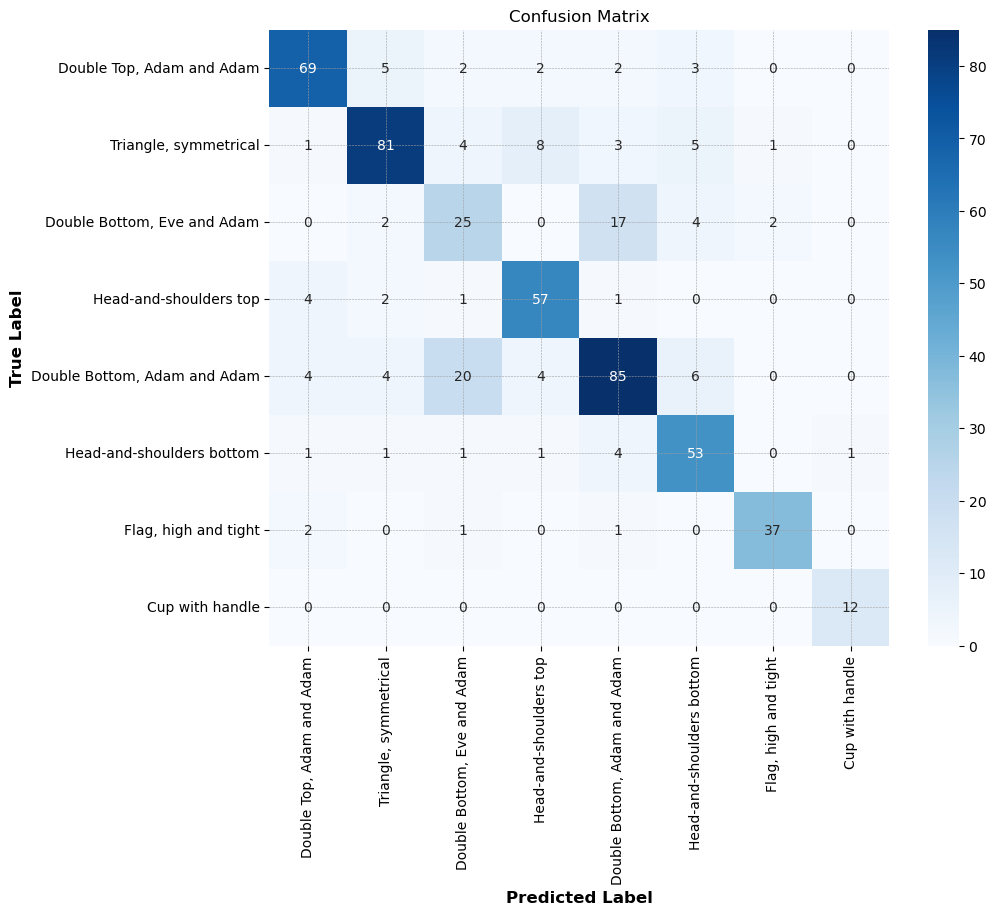

In [32]:
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.padder import PaddingTransformer
from sktime.datasets import load_unit_test
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

my_padded_multi_rocket_aug = PaddingTransformer() * RocketClassifier(rocket_transform='multirocket')
my_padded_multi_rocket_aug.fit(X_train_aug, y_train_aug)
y_pred_multi_aug = my_padded_multi_rocket_aug.predict(X_test) 

# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_multi_aug)
print(f"Accuracy: {accuracy:.2f}")

# Create the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_multi_aug)

# Create a DataFrame from the confusion matrix
cm_df3 = pd.DataFrame(cm3, index=pattern_encoding.keys(), columns=pattern_encoding.keys())

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df3, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
